In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import scipy as sp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [3]:
#p_data_nocharge = sp.sparse.load_npz('../data/20x20x20/pDisc_40000_nocharge.npz')
#C_data_nocharge = sp.sparse.load_npz('../data/20x20x20/CDisc_40000_nocharge.npz')


p_data = sp.sparse.load_npz('../data/NO-tilt/20x20x10/pDisc_40000_20x20x10.npz')
C_data = sp.sparse.load_npz('../data/NO-tilt/20x20x10/CDisc_40000_20x20x10.npz')

#same labels will work
p_labels = np.zeros((p_data.shape[0],))
C_labels = np.ones((C_data.shape[0],))

In [9]:
#full_data_nocharge = sp.sparse.vstack([p_data_nocharge, C_data_nocharge], format='csr')
full_data = sp.sparse.vstack([p_data_charge, C_data_charge], format='csr')

full_labels = np.hstack((p_labels, C_labels))
#print(full_data_nocharge.shape)
print(full_data.shape)

print(full_labels.shape)

(80002, 4000)
(80002,)


In [10]:
# X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(full_data_nocharge, full_labels, test_size=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(full_data, full_labels, test_size=0.25, random_state=42)

In [12]:
reg = 1
iterations = 1000
nc = LogisticRegression(C=reg, max_iter=iterations)
y_pred = nc.fit(X_train, y_train).predict(X_test)

In [14]:
print("With regularization C=" + str(reg) + " precision: " + str(metrics.precision_score(y_test, y_pred)))
print("With regularization C=" + str(reg) + " accuracy: " + str(metrics.accuracy_score(y_test, y_pred)))
print(metrics.classification_report(y_test, y_pred))

With regularization C=1 precision: 0.90592942142
With regularization C=1 accuracy: 0.89600519974
             precision    recall  f1-score   support

        0.0       0.89      0.91      0.90     10007
        1.0       0.91      0.88      0.89      9994

avg / total       0.90      0.90      0.90     20001



In [16]:
C_vals = [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]
print(C_vals)

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]


In [17]:
# precisions_nc = []
# recalls_nc = []
# f1s_nc = []

precisions = []
recalls = []
f1s = []

for c in C_vals:
#     y_pred_nc = LogisticRegression(C=c, max_iter=iterations).fit(X_train, y_train).predict(X_test)
    
#     precisions_nc.append(metrics.precision_score(y_test_nc, y_pred_nc))
#     recalls_nc.append(metrics.recall_score(y_test_nc, y_pred_nc))
#     f1s_nc.append(metrics.f1_score(y_test_nc, y_pred_nc))
#     print("No Charge and C=" + str(c) + " f1=" + str(metrics.f1_score(y_test_nc, y_pred_nc)))
    
    y_pred = LogisticRegression(C=c, max_iter=iterations).fit(X_train, y_train).predict(X_test)
    
    precisions.append(metrics.precision_score(y_test, y_pred))
    recalls.append(metrics.recall_score(y_test, y_pred))
    f1s.append(metrics.f1_score(y_test, y_pred))
    print("Charge and C=" + str(c) + " f1=" + str(metrics.f1_score(y_test, y_pred)))

Charge and C=1e-05 f1=0.837569687234
Charge and C=0.0001 f1=0.864736919966
Charge and C=0.001 f1=0.894289308176
Charge and C=0.01 f1=0.898575700745
Charge and C=0.1 f1=0.895387734415
Charge and C=1.0 f1=0.894640867187
Charge and C=10.0 f1=0.894574193222
Charge and C=100.0 f1=0.894574193222
Charge and C=1000.0 f1=0.894630192503
Charge and C=10000.0 f1=0.894630192503


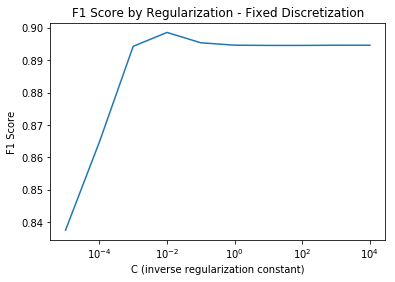

In [19]:
plt.plot(C_vals, f1s)

plt.xscale('log')
        
plt.xlabel('C (inverse regularization constant)')
plt.ylabel('F1 Score')
plt.title('F1 Score by Regularization - Fixed Discretization')

#plt.savefig('/home/taylor/Documents/independent-research/plots/results/LogisticRegression_F1xC_CorrectDisc.pdf')

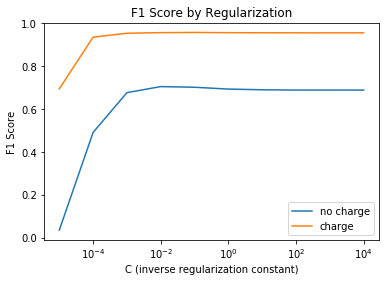

In [30]:
a = np.arange(len(C_vals))

plt.plot(C_vals, f1s_nc)
plt.plot(C_vals, f1s_c)

plt.xscale('log')
        
plt.xlabel('C (inverse regularization constant)')
plt.ylabel('F1 Score')
plt.title('F1 Score by Regularization')
plt.legend(['no charge', 'charge'], loc='lower right')

#plt.savefig('/home/taylor/Documents/independent-research/plots/results/LogisticRegression_F1xC.pdf')

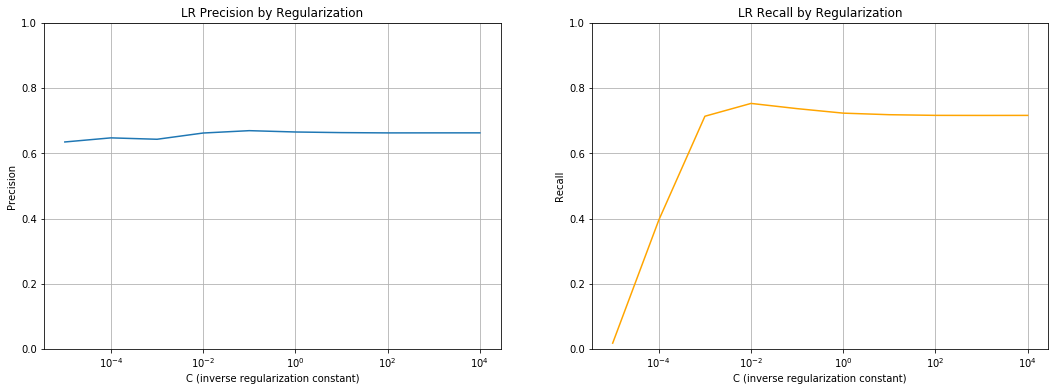

In [33]:
fig, ax = plt.subplots(1, 2, squeeze=True, figsize=(18, 6))

ax[0].plot(C_vals, precisions_nc)
ax[0].semilogx()     
ax[0].set_ylim(0,1)
ax[0].set_xlabel('C (inverse regularization constant)')
ax[0].set_ylabel('Precision')
ax[0].set_title('LR Precision by Regularization')
ax[0].grid()

#######################################################################################################################
ax[1].plot(C_vals, recalls_nc, c='orange')
ax[1].semilogx()
ax[1].set_ylim(0,1)
ax[1].set_xlabel('C (inverse regularization constant)')
ax[1].set_ylabel('Recall')
ax[1].set_title('LR Recall by Regularization')
ax[1].grid()

#fig.savefig('/home/taylor/Documents/independent-research/plots/results/LogisticRegression_C_PR.pdf')

In [42]:
# param_grid = {'C': [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]}
# scores = ['precision', 'recall']

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()
#     clf = GridSearchCV(LogisticRegression(), param_grid)
#     clf.fit(X_train_nc, y_train_nc)
    
#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test_nc, clf.predict(X_test_nc)
#     print(classification_report(y_true, y_pred))
#     print('')

# Data with random noise

In [36]:
p_data_NOISE = sp.sparse.load_npz('/home/taylor/Documents/independent-research/data/20x20x20/pDisc_40000_charge_NOISE_nodrop.npz')
C_data_NOISE = sp.sparse.load_npz('/home/taylor/Documents/independent-research/data/20x20x20/CDisc_40000_charge_NOISE_nodrop.npz')

p_labels_NOISE = np.zeros((p_data_nocharge.shape[0],))
C_labels_NOISE = np.ones((C_data_nocharge.shape[0],))

In [37]:
full_data_NOISE = sp.sparse.vstack([p_data_NOISE, C_data_NOISE], format='csr')

full_labels_NOISE = np.hstack((p_labels_NOISE, C_labels_NOISE))

print(full_data_NOISE.shape)
print(full_labels_NOISE.shape)

(80002, 8000)
(80002,)


In [38]:
X_train_NOISE, X_test_NOISE, y_train_NOISE, y_test_NOISE = train_test_split(full_data_NOISE, full_labels_NOISE, test_size=0.25, random_state=42)

In [44]:
C_vals = [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]

f1s_NOISE = []

for c in C_vals:
    y_pred_NOISE = LogisticRegression(C=c, max_iter=iterations).fit(X_train_NOISE, y_train_NOISE).predict(X_test_NOISE)
    f1s_NOISE.append(metrics.f1_score(y_test_NOISE, y_pred_NOISE))

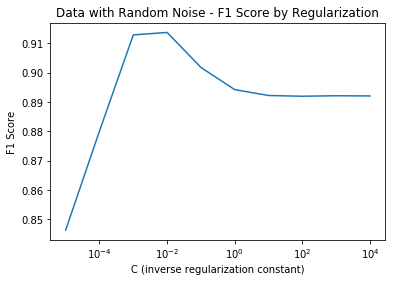

In [45]:
a = np.arange(len(C_vals))

plt.plot(C_vals, f1s_NOISE)

plt.xscale('log')
        
plt.xlabel('C (inverse regularization constant)')
plt.ylabel('F1 Score')
plt.title('Data with Random Noise - F1 Score by Regularization')

#plt.savefig('/home/taylor/Documents/independent-research/plots/results/LogisticRegression_F1xC_NOISE.pdf')

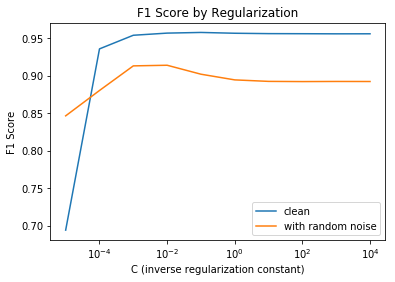

In [48]:
a = np.arange(len(C_vals))

plt.plot(C_vals, f1s_c)
plt.plot(C_vals, f1s_NOISE)

plt.xscale('log')
        
plt.xlabel('C (inverse regularization constant)')
plt.ylabel('F1 Score')
plt.title('F1 Score by Regularization')
plt.legend(['clean', 'with random noise'], loc='lower right')

#plt.savefig('/home/taylor/Documents/independent-research/plots/results/LogisticRegression_F1xC_NOISe.pdf')